# PROJECT 4 : CREDIT RISK - CLUSTERING 

## Goal:
### Can we identify distinct clusters of borrowers that represent different levels of credit risk (such as low, medium, and high)?

The goal of this project is to use clustering to find hidden patterns among loan applicants and group them based on financial characteristics like income, loan amount, and credit history. By identifying clusters that correspond to different levels of credit risk, we can better understand borrower profiles and potentially help lenders design fairer and more data-driven lending strategies.

# _____________________________________________________________________

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# _____________________________________________________________________

## Features and Their Meanings

person_age – The age of the loan applicant. Younger applicants may have shorter credit histories, which can affect risk.

person_income – The applicant’s annual income. Higher income often indicates a stronger ability to repay loans.

person_home_ownership – Type of housing situation (e.g., rent, own, mortgage). This can reflect financial stability.

person_emp_length – Number of years the applicant has been employed. Longer employment usually suggests more stability.

loan_intent – The stated purpose of the loan (e.g., education, medical, personal, home improvement). Different intents can have different risk patterns.

loan_amnt – The amount of money the applicant is requesting. Larger loans can increase repayment risk.

loan_int_rate – The interest rate charged on the loan. Higher interest rates often go to higher-risk borrowers.

loan_percent_income – The percentage of the applicant’s income that would go toward paying off the loan. A higher percentage means more financial strain and higher risk.

cb_person_default_on_file – Whether the applicant has previously defaulted (Yes/No). Past defaults strongly signal higher risk.

cb_person_cred_hist_length – Length of the applicant’s credit history in years. A longer history provides more data to assess creditworthiness.

# _____________________________________________________________________

In [3]:
df= pd.read_csv('credit_risk_dataset.csv')
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
print(df.shape)

(32581, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:

min_value = df['person_emp_length'].min()
max_value = df['person_emp_length'].max()
print(f'Minimum employment length: {min_value}')
print(f'Maximum employment length: {max_value}')




Minimum employment length: 0.0
Maximum employment length: 123.0


In [8]:
min_value = df['person_age'].min()
max_value = df['person_age'].max()
print(f'Minimum employment length: {min_value}')
print(f'Maximum employment length: {max_value}')

Minimum employment length: 20
Maximum employment length: 144


In [9]:
# Keep only rows where age is between 18 and 65
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 65)]

In [10]:
df = df[df['person_emp_length'] <= 50]


In [11]:
min_value = df['person_emp_length'].min()
max_value = df['person_emp_length'].max()

print(f'Minimum employment length: {min_value}')
print(f'Maximum employment length: {max_value}')    

Minimum employment length: 0.0
Maximum employment length: 38.0


In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3043
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
df.shape

(28607, 12)

In [16]:
df_encoded = pd.get_dummies(
    df,
    columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'],
    drop_first=True,
    dtype=int  # 👈 ensures output is 0 or 1, not True/False
)


# _____________________________________________________________________

## EDA Visualization 

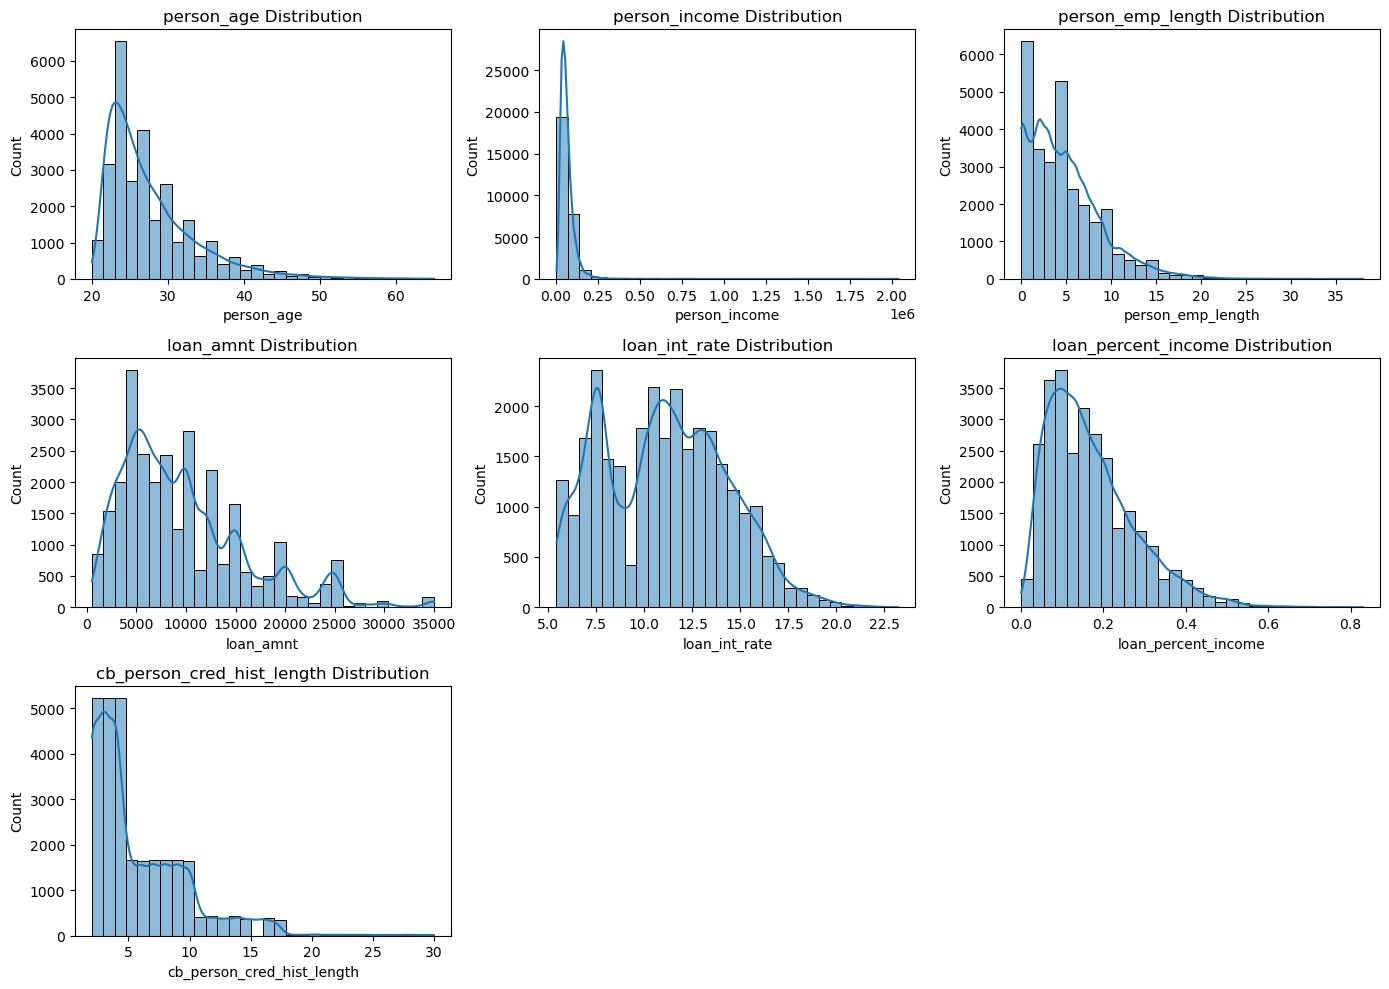

In [17]:
numeric_cols = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

 ### EDA: Numeric Feature Distributions
The histograms below display the distributions of key numeric features.
* **Skewed Data:** `person_age`, `person_income`, and `person_emp_length` are all heavily right-skewed, indicating most applicants are younger with lower-to-moderate incomes and employment lengths.
* **Loan Amounts:** `loan_amnt` shows frequent peaks at round numbers (e.g., $5k, $10k, $15k), representing standard loan products.

# _____________________________________________________________________

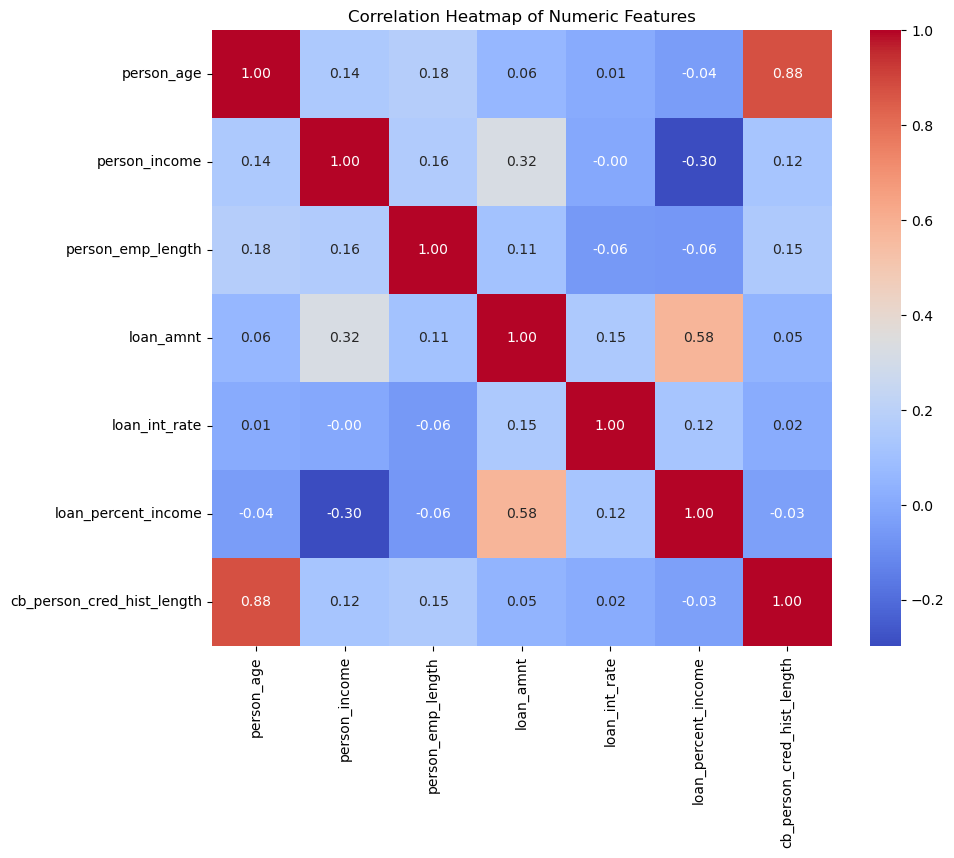

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## EDA: Correlation Heatmap

The heatmap above visualizes the pairwise correlation between key numeric features. Correlation values range from -1 to 1, where values closer to 1 indicate a strong positive relationship, and values closer to -1 indicate a strong negative relationship.

## Key Observations:

person_age & cb_person_cred_hist_length (0.88): There is a very strong positive correlation here, which is logical: older individuals have had more time to build a longer credit history.

loan_amnt & loan_percent_income (0.58): A moderate positive correlation. As loan amounts get larger, they naturally tend to make up a larger percentage of a person's income.

person_income & loan_amnt (0.32): A positive correlation indicates that people with higher incomes tend to take out larger loans, though the relationship isn't extremely strong.

person_income & loan_percent_income (-0.30): A negative correlation, meaning that as income increases, the loan amount tends to be a smaller percentage of that total income.

# _____________________________________________________________________

## Storytelling: Interpreting the Clusters
Based on the average feature values in the summary table above, we can interpret the three distinct borrower personas identified by the K-Means algorithm.

*(Note: The labels below are based on standardized deviations from the mean. Positive values are above average, negative values are below average.)*

### Cluster 0: High Risk Borrowers
* **Characteristics:** This group has the highest interest rates (+0.40) and extremely high loan-percent-income ratios (+1.09). They also have the highest history of previous defaults (+0.24).
* **Insight:** These borrowers are highly leveraged, taking out large loans relative to their income, and have a poor track record. They represent the highest credit risk.

### Cluster 1: Established, Low Risk Borrowers
* **Characteristics:** These are older applicants (+1.65) with the highest incomes (+0.48) and the longest credit histories (+1.64).
* **Insight:** These are financially stable, established individuals. Despite taking out loans, their high income and long history suggest they are reliable borrowers.

### Cluster 2: Cautious / Medium Risk Borrowers
* **Characteristics:** This group takes out the smallest loans (-0.53) and has the lowest debt-to-income ratio (-0.47). They are generally younger with average incomes.
* **Insight:** While they lack the long credit history of Cluster 1, their cautious borrowing behavior (small loans they can easily afford) makes them a moderate risk compared to the highly leveraged Cluster 0.

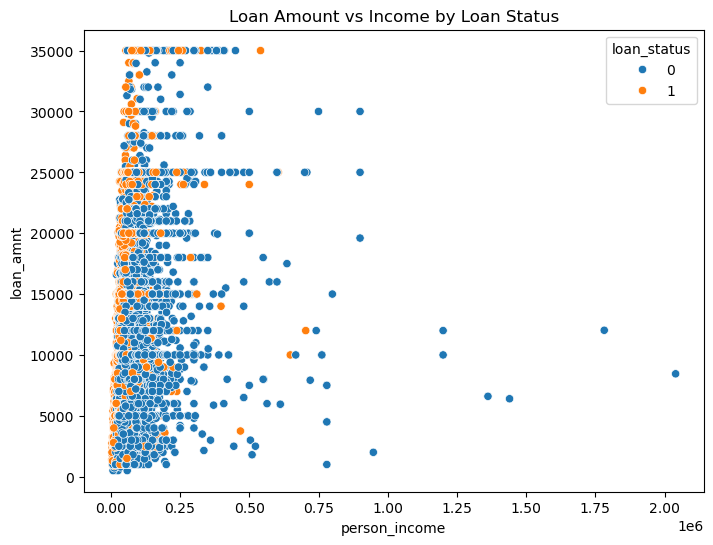

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount vs Income by Loan Status')
plt.show()

### EDA: Loan Amount vs. Income (by Loan Status)

This scatter plot visualizes the relationship between person_income, loan_amnt, and loan_status:

High Risk Zone: The top-left corner (low income, high loan amount) shows a dense concentration of orange dots (loan defaults = 1), highlighting that high debt-to-income ratios are a major risk factor.

Low Risk Zone: As income increases (moving right along the x-axis), defaults become much rarer, even for larger loans. The far right of the plot is almost entirely blue (non-defaulters = 0).

# _____________________________________________________________________

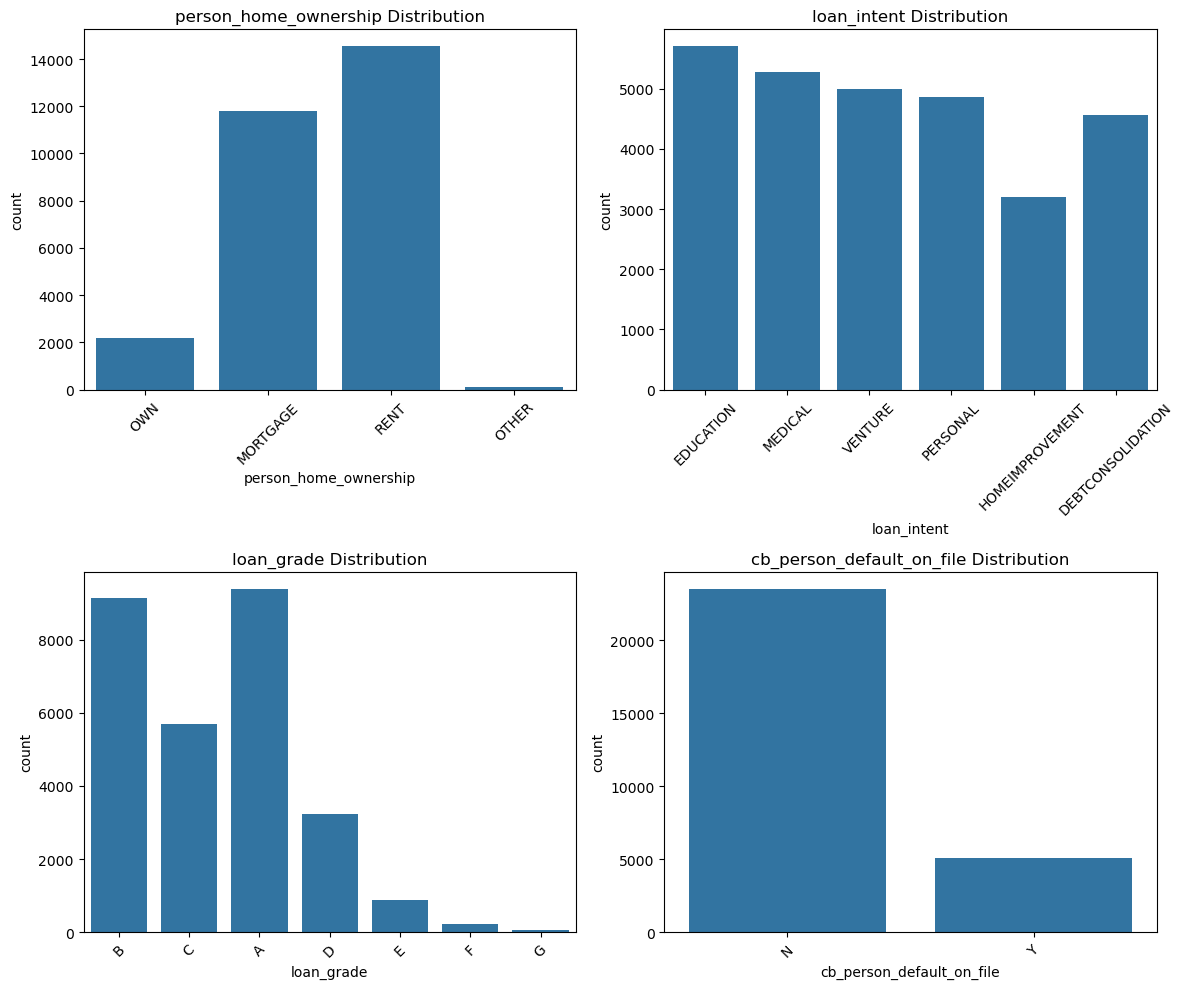

In [20]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EDA: Categorical Feature Distributions

These plots continue the analysis of categorical features:

person_home_ownership: RENT is the most common category, closely followed by MORTGAGE. A much smaller portion of applicants OWN their homes outright, and the 'OTHER' category is negligible.

loan_intent: Loan purposes are fairly well-distributed. EDUCATION is the most frequent intent, followed by MEDICAL, VENTURE, and PERSONAL. DEBTCONSOLIDATION and HOMEIMPROVEMENT are slightly less common but still significant.

loan_grade: (From previous image, included for completeness if you merge them) Most loans are graded A or B, indicating a skew towards lower-risk assessments by the lender, with very few loans in the riskiest grades (E, F, G).

cb_person_default_on_file: (From previous image) The vast majority of applicants have no (N) prior defaults on file.

# _____________________________________________________________________

In [21]:
# Define the features you want to keep
keep_features = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length'
]

# Keep only those columns (and their one-hot encoded variants)
df_encoded = df_encoded[[col for col in df_encoded.columns if any(feat in col for feat in keep_features)]]

In [22]:

# Numeric columns
numeric_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [23]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,-1.104408,-1.102588,0.054932,-1.368046,0.030957,-0.653321,-0.944197,0,1,0,1,0,0,0,0,0
2,-0.442595,-1.102588,-0.938073,-0.656773,0.566710,3.765882,-0.694235,0,0,0,0,0,1,0,0,0
3,-0.773501,-0.017962,-0.193320,4.006020,1.297564,3.389780,-0.944197,0,0,1,0,0,1,0,0,0
4,-0.608048,-0.233334,0.799685,4.006020,1.000268,3.577831,-0.444273,0,0,1,0,0,1,0,0,1
5,-1.104408,-1.096767,-0.689822,-1.130955,-1.207779,0.757063,-0.944197,0,1,0,0,0,0,0,1,0


# _____________________________________________________________________

## What is Clustering?
Clustering is an unsupervised machine learning technique used to group similar data points together based on their features. The goal is to ensure that data points within the same cluster are more similar to each other than they are to points in other clusters.

### How K-Means Works
For this project, I am using **K-Means Clustering**. It works by:
1. Initializing $k$ centroids randomly.
2. Assigning each data point to the nearest centroid (based on Euclidean distance).
3. Recalculating the centroids based on the mean of the points assigned to each cluster.
4. Repeating steps 2 and 3 until convergence (centroids stop moving).

### Why K-Means over Agglomerative Clustering?
I chose K-Means for this credit risk dataset because:
* **Scalability:** K-Means is computationally efficient ($O(n)$), making it suitable for our dataset of ~32,000 rows.
* **Performance:** Agglomerative (Hierarchical) clustering has a high computational complexity (often $O(n^3)$), which would be very slow on a dataset this size without significant sampling.

# _____________________________________________________________________

## K-Means Clustering 

In [24]:
X = df_encoded.copy()

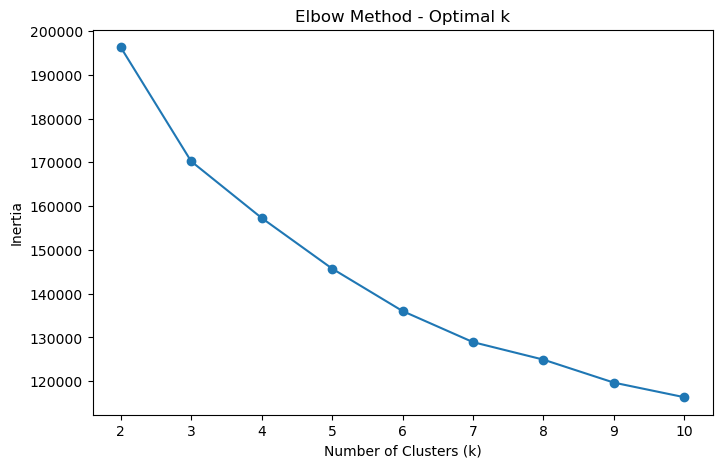

In [25]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(X)

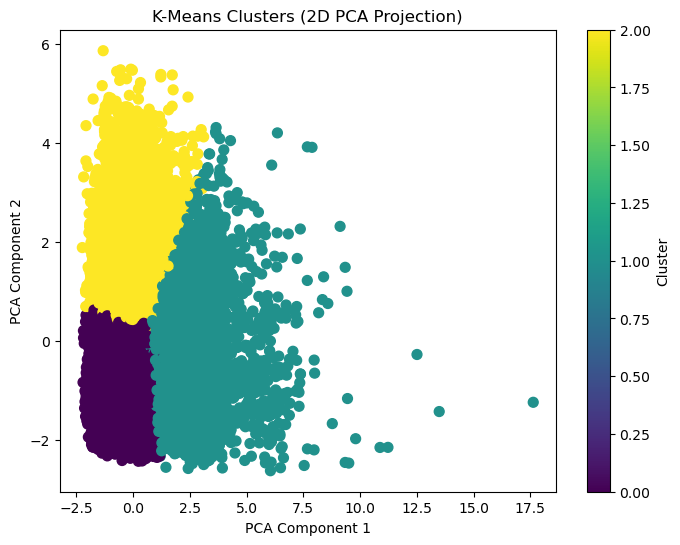

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df_encoded['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [28]:
cluster_summary = df_encoded.groupby('cluster').mean()
cluster_summary

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
cluster,,,,,,,,,,,,,,,,
0,-0.356625,-0.123018,-0.179658,-0.533838,-0.186419,-0.474881,-0.354247,0.002387,0.072371,0.526762,0.213029,0.100578,0.186456,0.167797,0.171441,0.146061
1,1.656929,0.474594,0.713016,0.065847,-0.041448,-0.244612,1.643751,0.003398,0.084307,0.401571,0.151625,0.147377,0.181780,0.184753,0.180718,0.173285
2,-0.266381,-0.034668,-0.062381,1.026011,0.396316,1.091608,-0.263348,0.005013,0.080576,0.533083,0.200000,0.113158,0.182206,0.166291,0.177820,0.244987


In [29]:
import numpy as np

# Sort columns by feature category
cluster_summary = cluster_summary.T

# Display with fewer decimals
cluster_summary.round(2)

cluster,0,1,2
person_age,-0.36,1.66,-0.27
person_income,-0.12,0.47,-0.03
person_emp_length,-0.18,0.71,-0.06
loan_amnt,-0.53,0.07,1.03
loan_int_rate,-0.19,-0.04,0.40
loan_percent_income,-0.47,-0.24,1.09
cb_person_cred_hist_length,-0.35,1.64,-0.26
person_home_ownership_OTHER,0.00,0.00,0.01
person_home_ownership_OWN,0.07,0.08,0.08
person_home_ownership_RENT,0.53,0.40,0.53


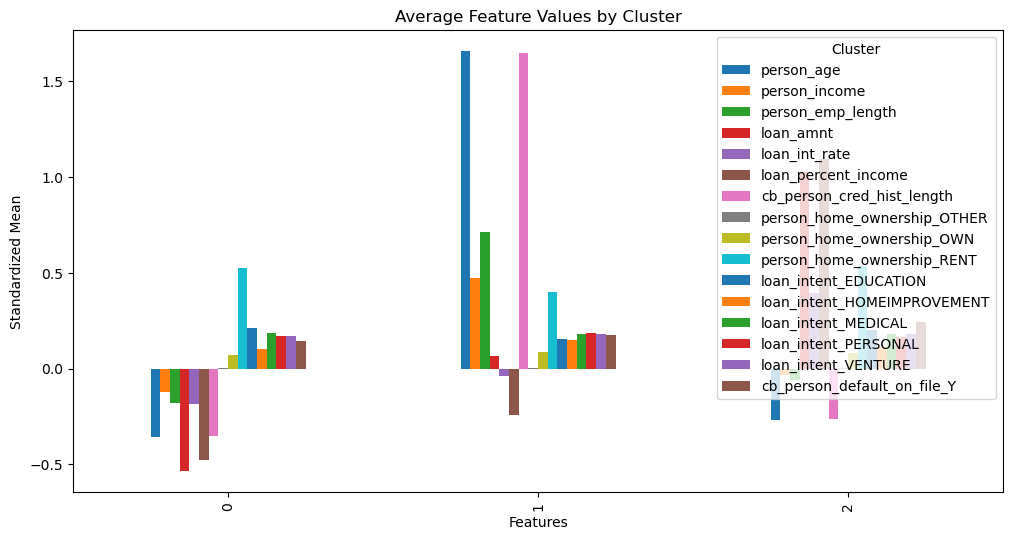

In [30]:
cluster_summary.T.plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values by Cluster')
plt.ylabel('Standardized Mean')
plt.xlabel('Features')
plt.legend(title='Cluster')
plt.show()

## Storytelling: Cluster Persona Analysis
By analyzing the average standardized features for each cluster, distinct borrower personas emerge that help in assessing credit risk.

### Cluster 0: The Cautious Borrowers (Low Risk)
* **Key Traits:** Below-average loan amounts and very low debt-to-income ratios.
* **Narrative:** These borrowers are generally younger with average incomes, but they are highly risk-averse. They only borrow small amounts that they can easily repay, making them safe bets for lenders despite their shorter credit histories.

### Cluster 1: The Established Borrowers (Low Risk)
* **Key Traits:** Significantly older age, higher incomes, long employment duration, and extensive credit histories.
* **Narrative:** This group represents financially stable individuals who have spent years building their careers and credit. Their high income and stability make them reliable borrowers.

### Cluster 2: The Over-Leveraged Borrowers (High Risk)
* **Key Traits:** High loan amounts, very high loan-to-income ratios, higher interest rates, and the highest frequency of historical defaults.
* **Narrative:** This is the riskiest segment. These borrowers are taking on more debt than their income supports comfortably. Lenders have likely already flagged them as risky (indicated by the higher interest rates assigned to them), and they have a stronger history of defaulting on previous obligations.

In [32]:
# Mapping based on the latest cluster summary analysis
cluster_label_map = {
    0: 'Low Risk (Cautious)',
    1: 'Low Risk (Established)',
    2: 'High Risk (Over-Leveraged)'
}

df_encoded['risk_label'] = df_encoded['cluster'].map(cluster_label_map)

# Display the counts of each risk group
df_encoded['risk_label'].value_counts()

risk_label
Low Risk (Cautious)           15918
High Risk (Over-Leveraged)     7980
Low Risk (Established)         4709
Name: count, dtype: int64

## Impact & Ethical Considerations
Applying unsupervised machine learning, such as K-Means clustering, to credit risk assessment introduces significant ethical implications and potential societal impacts. While it can increase efficiency, it carries risks if deployed without human oversight.

### Potential Negative Impacts & Ethical Risks
* **Bias Amplification & Disparate Impact:** Even if sensitive demographic data (race, gender, etc.) is explicitly excluded from the model, features like `person_income` and `cb_person_default_on_file` often correlate strongly with these protected characteristics due to historical systemic inequalities. Relying solely on these clusters for lending decisions could automate and scale up historical discrimination ("algorithmic redlining").
* **Negative Feedback Loops:** Cluster 2 represents "Cautious" or younger borrowers with thin credit files. If lenders use these clusters to automatically deny high-interest loans to this group, these individuals may never get the opportunity to build the credit history required to move into the "Established" Cluster 1. The model thereby creates a self-fulfilling prophecy, keeping certain groups perpetually "risky."
* **Lack of Explainability (The "Black Box" Problem):** If a borrower is denied a loan because they fall into Cluster 0, it can be difficult to explain exactly *why* to them in simple terms, compared to traditional credit scoring. This lack of transparency makes it hard for borrowers to know what specific actions they need to take to improve their standing.

### Potential Positive Impacts
* **Tailored Financial Products:** Instead of generic rejections, lenders could use these clusters to offer targeted help. For example, "Cluster 0 (High Risk)" applicants might be offered secured credit cards or financial literacy courses, while "Cluster 2 (Cautious)" applicants could be offered smaller, starter ("credit-builder") loans to help them establish history safely.